# Attrition Dataset project

In [1]:
import pandas as pd
import numpy as np

In [2]:
general_data = pd.read_csv("general_data.csv")
print(general_data.shape)

(4410, 24)


In [3]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


### Finding Null

In [4]:
print("Total number of NULL's",general_data.isnull().sum().sum())
general_data.dropna(inplace=True)
print("Total number of NULL's after removing ",general_data.isnull().sum().sum())

Total number of NULL's 28
Total number of NULL's after removing  0


### Remove Duplicates

In [5]:
final_df_dupliactedRows=general_data[general_data.duplicated( keep=False)].shape[0]
final_df_dupliactedRows

0

### EDA
__We will cover how to visually analyze:__
- Numerical variables with histograms,
- Categorical variables with count plots,
- Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
- Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.__

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

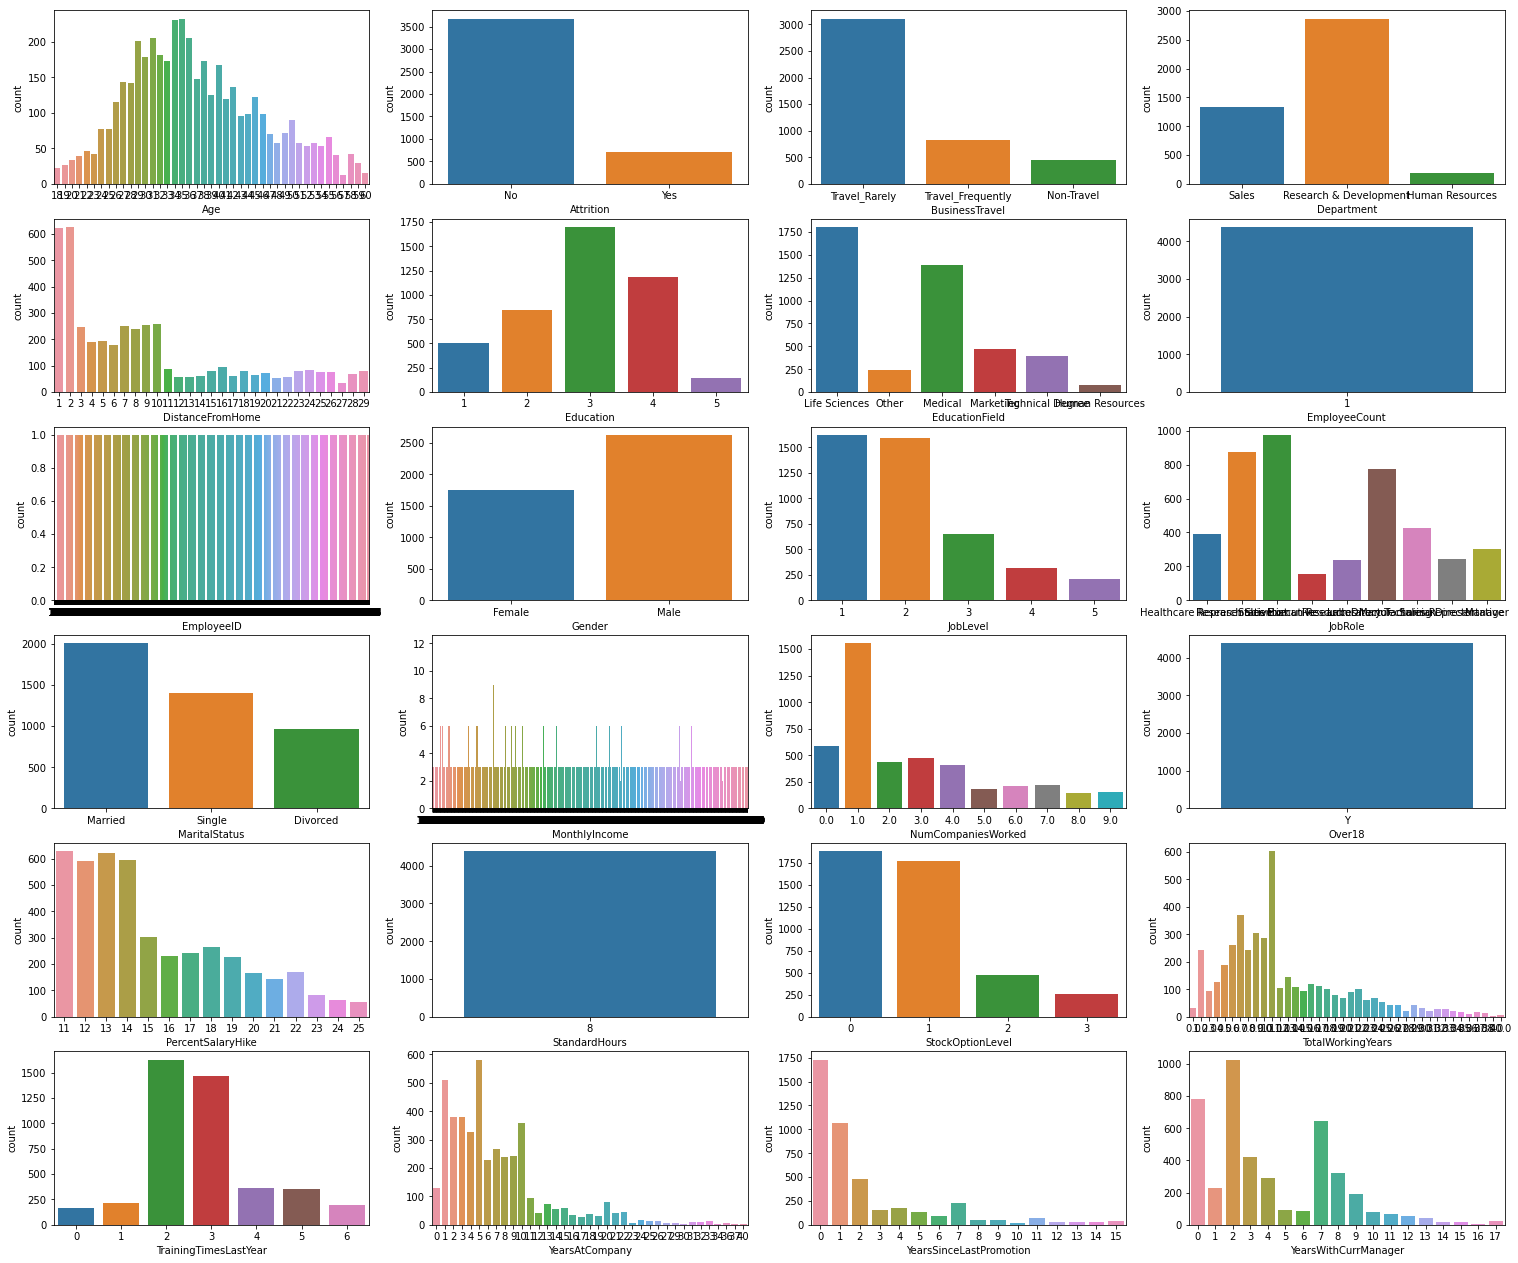

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(general_data.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=general_data,ax=ax)
plt.show()

### numerical columns doing univariant analysis

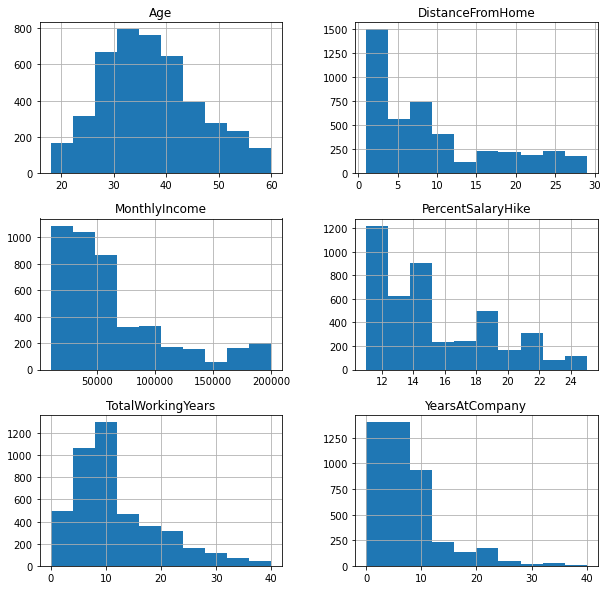

In [8]:
columns=general_data.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
general_data[num_col_eda].hist(figsize=(10,10))
plt.show()

### Observation from above plot

- __Except Age most of the Columns are in Skew Distribistion form__
- __Age Feature Distribution is almost Normal Distribution__

In [30]:
num_attrition=num_col_eda+['Attrition']
Education=['Below-College','College','Bachelor','Master','Doctor']
val=[Education]
cat1=['Education']
cat_col_eda=set(columns) - set(num_col_eda)
cat_col_eda=set(cat_col_eda) - set(cat1)
fig = plt.figure(figsize=(16,20))

<Figure size 1152x1440 with 0 Axes>

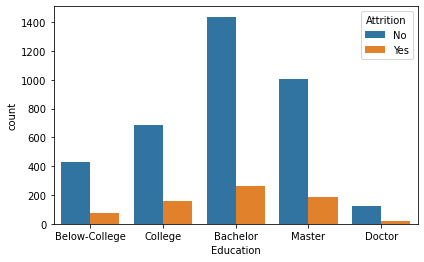

In [15]:
fig = plt.figure(figsize=(30,28))
for idx,i in enumerate(zip(cat1,val)):
    ax=plt.subplot(6,4,idx+1)
    sns.countplot(general_data[i[0]],hue=general_data['Attrition'],ax=ax)
    ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

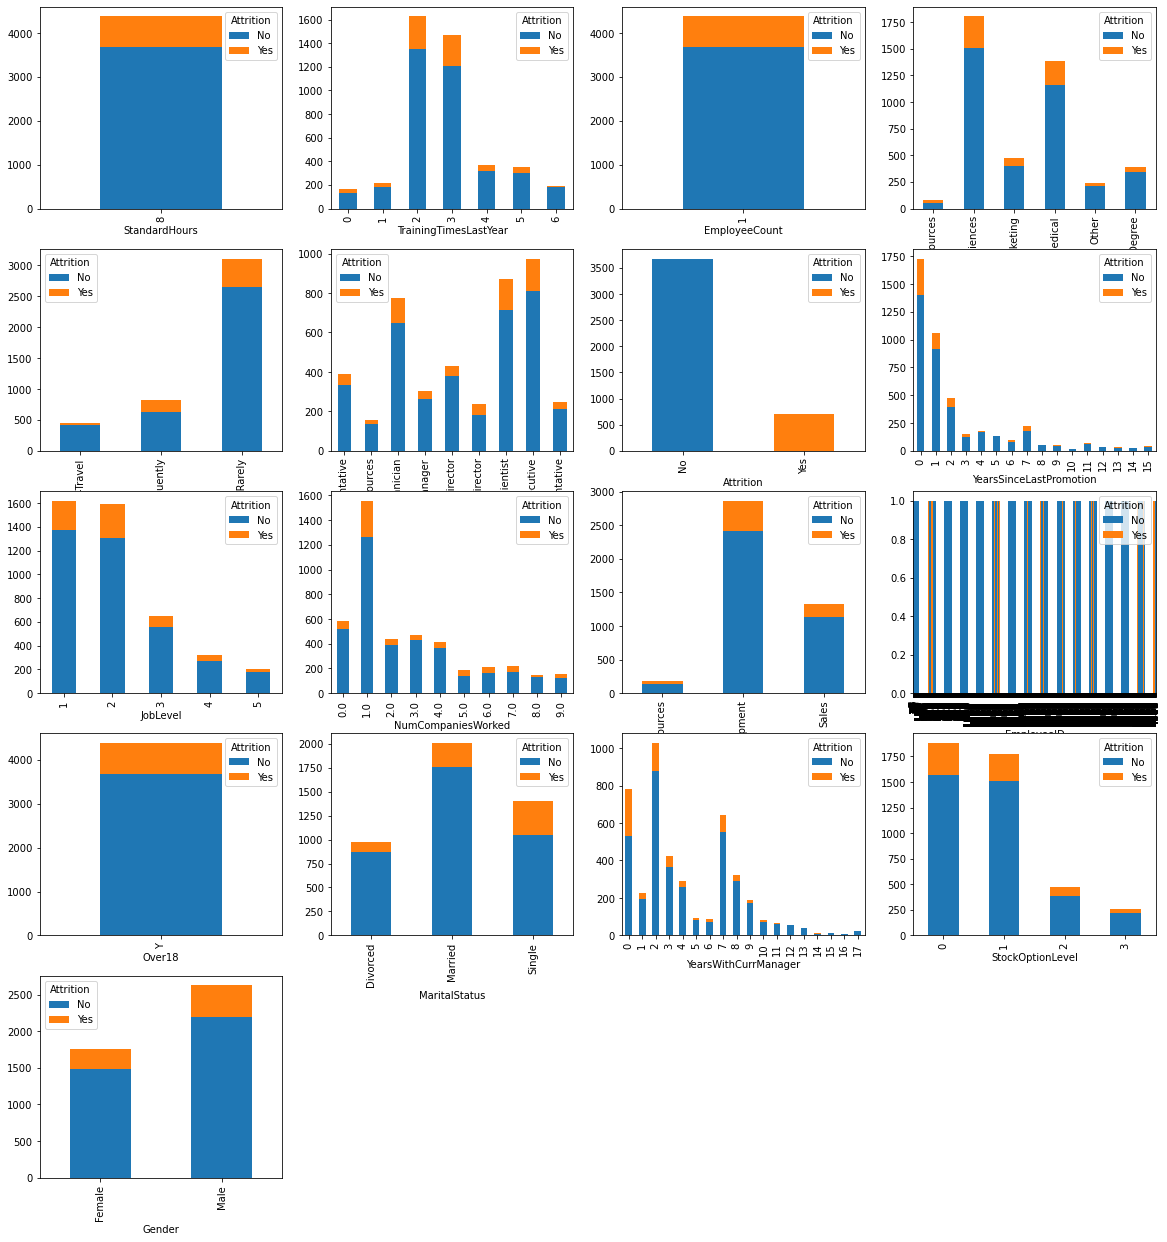

In [17]:
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(cat_col_eda):
    crosstab = pd.crosstab(index=general_data[i], columns=general_data["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)
plt.show()

### Finding Outlier in Numerical Data

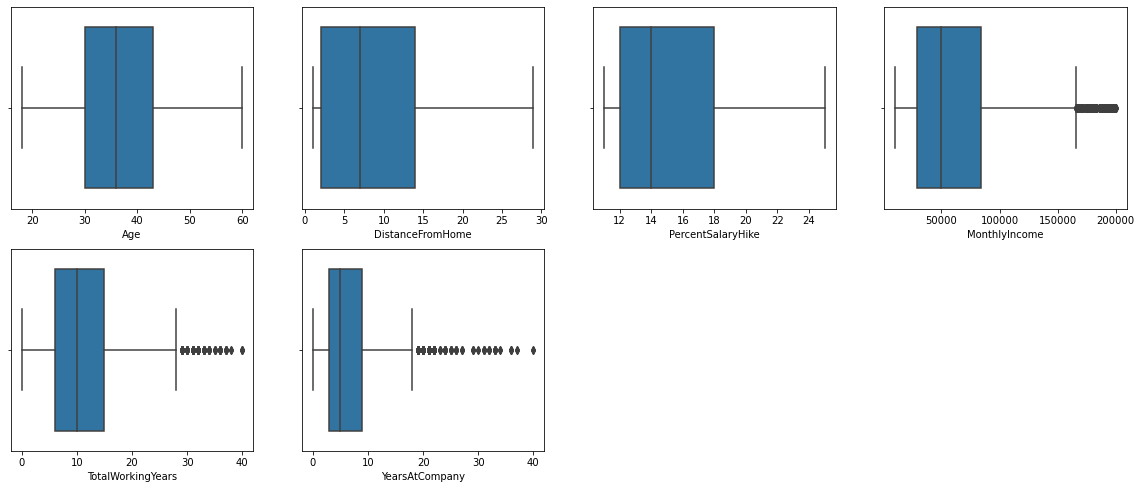

In [18]:
#Box Plot for finding "Outiler" in our data
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=general_data,ax=ax)

### Results from Above Graph:
__From above BoxPlot ,Trying to find is there any outliers in Numerical columns
can Observe outliers on MonthlyIncome , TotalWorkingYears and YearsAtCompany Columns
from observing on that columns can say those columns some of values not outliers Because there is highly possibilites on occuring those numerical values on those features or columns__

### Pair-Plot

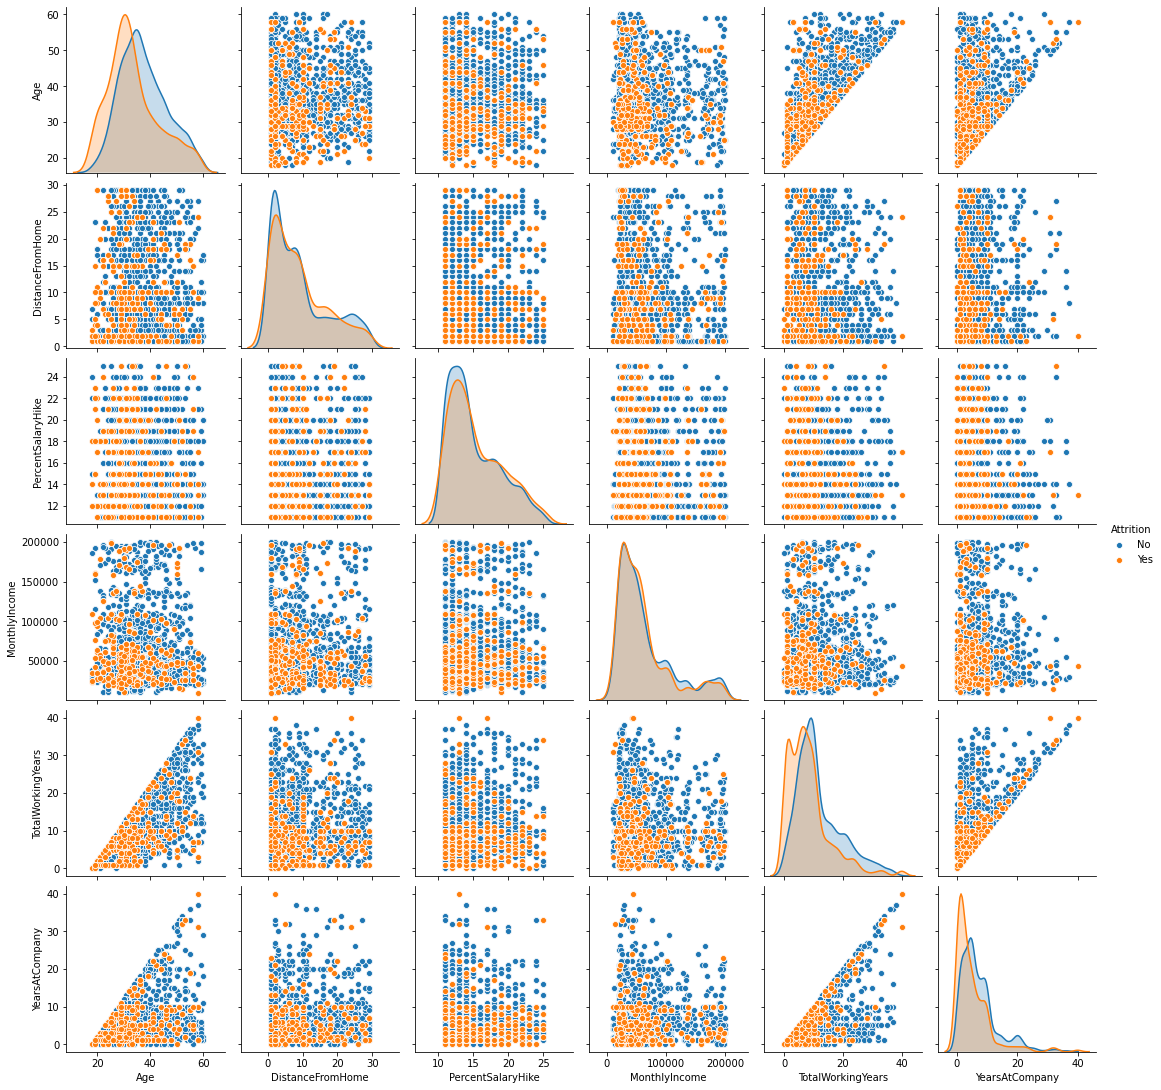

In [20]:
sns.pairplot(general_data[num_attrition], hue = 'Attrition')

### By Observing above plot ,for any considering any two columns we cannot get any conclusion on Attrition feature

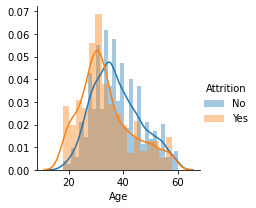

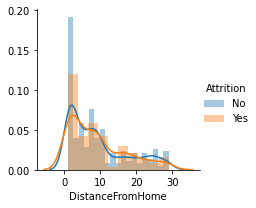

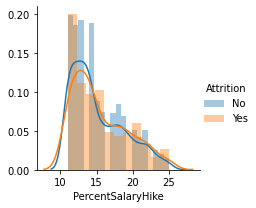

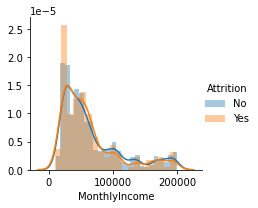

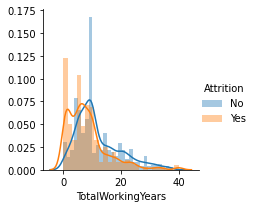

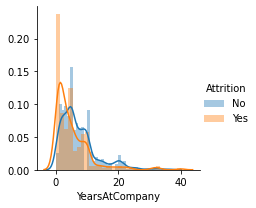

ValueError: could not convert string to float: 'No'

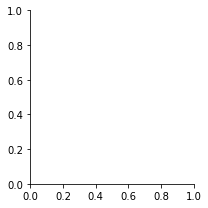

In [22]:
for i in num_attrition:
  sns.FacetGrid(general_data,hue="Attrition",height=3).map(sns.distplot,i).add_legend()
  plt.show()


### Finding Coorelation

__Corelation on NUmerical Features__

<AxesSubplot:>

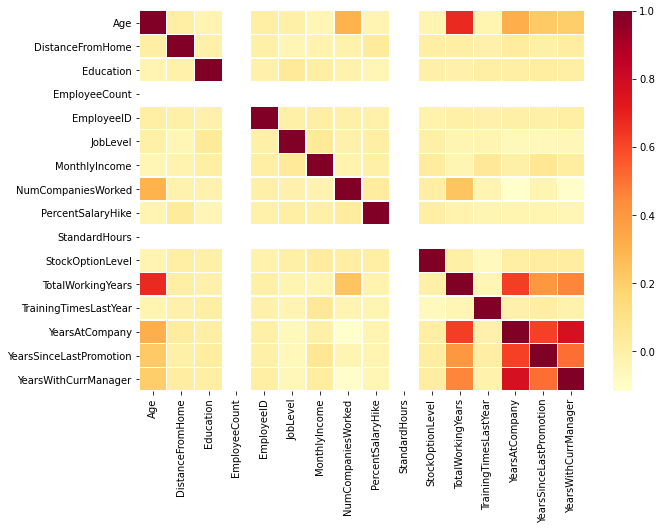

In [25]:
fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches

sns.heatmap(general_data.corr(),cmap='YlOrRd',linewidths=.5,ax=ax)

### There is is no higher dependency between column to columns from above heatMap Plot

### Feature Extraction


In [26]:
general_data['age_fs1']=general_data['Age'].map(lambda x: "20-40" if(x<40) else "40-60")

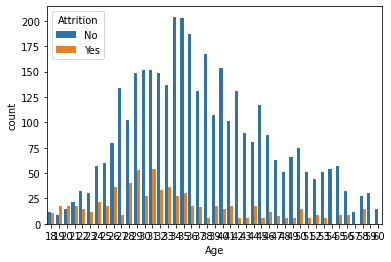

In [29]:
sns.countplot(general_data["Age"],hue=general_data['Attrition'])
plt.show()

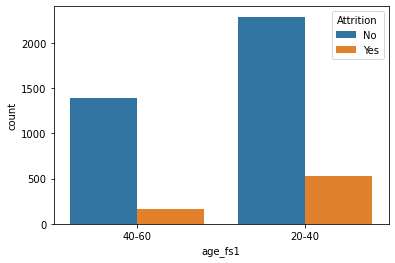

In [28]:
sns.countplot(general_data["age_fs1"],hue=general_data['Attrition'])
plt.show()

### Observation

### People leaving the company are tend to be more within range 20-20

### Categorical Varibles Coorelation ::
__ChiSquare Test for Independence ::
Hypothesis Testing Conditions ::
Our hypotheses will be:__

__Null Hypothesis (H0)__

__H0 :: There is no relationship between 2 categorival varibles ie .. Both features or varibles are independent of each other
Alternate Hypothesis (H1)__

__H1 :: There is Relationship between 2 categorical varibles .ie .. Both features or varibles are independent of each other__

In [42]:
import scipy.stats
from scipy.stats import chi2

categorical=[i for i in general_data.columns.tolist() if(general_data[i].dtype==object)]
categorical.remove("Over18")
results=[]
lst=[]
input_features=[]
chisqr_result=[]
for i in categorical:
  #print("*"*6 + i + "*"*6)
  final=[]
  for j in categorical:
    #Contingency Table
    contingency_table=pd.crosstab(general_data[i],general_data[j])
    #print('contingency_table :-\n',contingency_table)
    
    #Observed Values
    Observed_Values = contingency_table.values
    #print("Observed Values :-\n",Observed_Values)
    
    #Expected Values
    #import scipy.stats
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    #print("Expected Values :-\n",Expected_Values)


    #Degree of Freedom
    no_of_rows=Observed_Values.shape[0]
    no_of_columns=Observed_Values.shape[1]
    df=(no_of_rows-1)*(no_of_columns-1)
    #print("Degree of Freedom:-",df)

    #Significance Level 5%
    alpha=0.05


    #chi-square statistic - χ2
    #from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    #print("chi-square statistic:-",chi_square_statistic)


    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    #print('critical_value:',critical_value)

    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    #print('p-value:',p_value)

    
    #lst1=[df,chi_square_statistic,critical_value,p_value]
    lst1=[df,chi_square_statistic,p_value]
    
    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    if(chi_square_statistic>=critical_value):
      #print("Reject H0,There is a relationship between 2 categorical variables")
      test_stat=1
    else:
      #print("Retain H0,There is no relationship between 2 categorical variables")
      test_stat=0
    
    if(p_value<=alpha):
        ##print("Reject H0,There is a relationship between 2 categorical variables")
        p_val=1
    else:
        #print("Retain H0,There is no relationship between 2 categorical variables")
        p_val=0
        
    if((test_stat==1) and (p_val==1) ):
      final_output=1
    else:
      final_output=0
    
    lst.append(lst1)
    final.append(final_output)
    input_features.append((i,j))
    
    
  results.append(lst)
  chisqr_result.append(final)

print(input_features)  
print("\n\n\n\n")
print(results)
print("\n\n\n\n")
print(chisqr_result)

[('Attrition', 'Attrition'), ('Attrition', 'BusinessTravel'), ('Attrition', 'Department'), ('Attrition', 'EducationField'), ('Attrition', 'Gender'), ('Attrition', 'JobRole'), ('Attrition', 'MaritalStatus'), ('Attrition', 'age_fs1'), ('BusinessTravel', 'Attrition'), ('BusinessTravel', 'BusinessTravel'), ('BusinessTravel', 'Department'), ('BusinessTravel', 'EducationField'), ('BusinessTravel', 'Gender'), ('BusinessTravel', 'JobRole'), ('BusinessTravel', 'MaritalStatus'), ('BusinessTravel', 'age_fs1'), ('Department', 'Attrition'), ('Department', 'BusinessTravel'), ('Department', 'Department'), ('Department', 'EducationField'), ('Department', 'Gender'), ('Department', 'JobRole'), ('Department', 'MaritalStatus'), ('Department', 'age_fs1'), ('EducationField', 'Attrition'), ('EducationField', 'BusinessTravel'), ('EducationField', 'Department'), ('EducationField', 'EducationField'), ('EducationField', 'Gender'), ('EducationField', 'JobRole'), ('EducationField', 'MaritalStatus'), ('EducationFie

In [36]:
lst1 =[('Attrition', 'Attrition'), ('Attrition', 'BusinessTravel'), ('Attrition', 'Department'), ('Attrition', 'EducationField'), ('Attrition', 'Gender'), ('Attrition', 'JobRole'), ('Attrition', 'MaritalStatus'), ('Attrition', 'age_fs1'), ('BusinessTravel', 'Attrition'), ('BusinessTravel', 'BusinessTravel'), ('BusinessTravel', 'Department'), ('BusinessTravel', 'EducationField'), ('BusinessTravel', 'Gender'), ('BusinessTravel', 'JobRole'), ('BusinessTravel', 'MaritalStatus'), ('BusinessTravel', 'age_fs1'), ('Department', 'Attrition'), ('Department', 'BusinessTravel'), ('Department', 'Department'), ('Department', 'EducationField'), ('Department', 'Gender'), ('Department', 'JobRole'), ('Department', 'MaritalStatus'), ('Department', 'age_fs1'), ('EducationField', 'Attrition'), ('EducationField', 'BusinessTravel'), ('EducationField', 'Department'), ('EducationField', 'EducationField'), ('EducationField', 'Gender'), ('EducationField', 'JobRole'), ('EducationField', 'MaritalStatus'), ('EducationField', 'age_fs1'), ('Gender', 'Attrition'), ('Gender', 'BusinessTravel'), ('Gender', 'Department'), ('Gender', 'EducationField'), ('Gender', 'Gender'), ('Gender', 'JobRole'), ('Gender', 'MaritalStatus'), ('Gender', 'age_fs1'), ('JobRole', 'Attrition'), ('JobRole', 'BusinessTravel'), ('JobRole', 'Department'), ('JobRole', 'EducationField'), ('JobRole', 'Gender'), ('JobRole', 'JobRole'), ('JobRole', 'MaritalStatus'), ('JobRole', 'age_fs1'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'BusinessTravel'), ('MaritalStatus', 'Department'), ('MaritalStatus', 'EducationField'), ('MaritalStatus', 'Gender'), ('MaritalStatus', 'JobRole'), ('MaritalStatus', 'MaritalStatus'), ('MaritalStatus', 'age_fs1'), ('age_fs1', 'Attrition'), ('age_fs1', 'BusinessTravel'), ('age_fs1', 'Department'), ('age_fs1', 'EducationField'), ('age_fs1', 'Gender'), ('age_fs1', 'JobRole'), ('age_fs1', 'MaritalStatus'), ('age_fs1', 'age_fs1')]

In [37]:
len(lst1)

64

In [38]:
lst2 =[[1, 1, 1, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, 1, 0], [1, 1, 1, 1, 0, 0, 1, 0], [1, 1, 1, 1, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, 1, 1]]

In [40]:
len(lst2*8)

64

<AxesSubplot:>

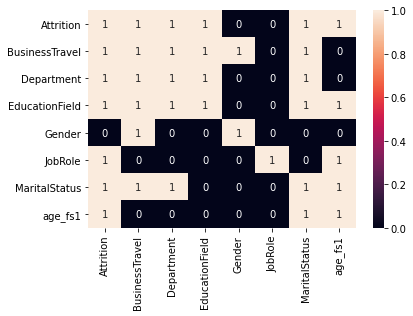

In [41]:
sns.heatmap(chisqr_result, 
        xticklabels=categorical,
        yticklabels=categorical,annot=True)

### From above plot can see there is relationship bw variables whose value is 1

## Final Conclusion

### From the above Correlation, Chi square statistical tests,histogram,pairplots,heat map we can conclude below

- __People who are single are tend to leave the company more, so management can offer good hikes to retain valuable resource__
- __People with Education level as Bachelors are tend to leave company more, could be to pursue higher education, so management can provide higher education options__
- __People from Research department are causing more attrition,management should hear their plea__
- __Could see lot of disparity with monthly income,that could be a concern__
- __People with age 20-20 are leaving more,so better to give them promotions,have regular one-on-one to get their concerns__
- __Can see diparity with people working for many years, management should take a call on that__